In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [2]:
np.random.seed(197390101)

In [3]:
n = 5
x = np.arange(0, n, 1)
y = np.random.rand(n) * 5

xerr = np.random.rand(2, n) + 0.1
yerr = np.random.rand(2, n) + 0.2

In [4]:
def make_error_boxes(
    ax, xdata, ydata, xerror, yerror, facecolor="r",
    edgecolor="none", alpha=0.5,
):
    # loop over data points; create box from errors at each point
    errorboxes = [
        Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)
    ]
    
    # create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)
    
    # add collection to axes
    ax.add_collection(pc)
    
    # plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr, fmt="none", ecolor="k")
    return artists

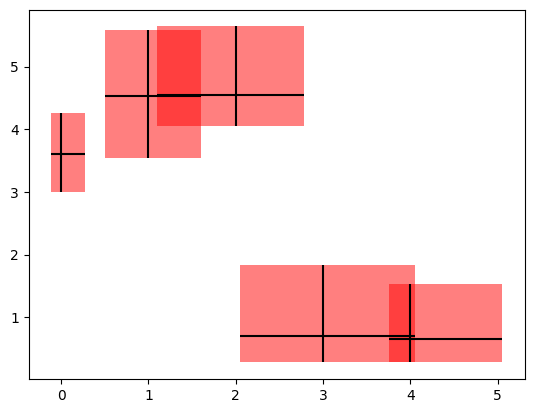

In [5]:
fig, ax = plt.subplots(1)
_ = make_error_boxes(ax, x, y, xerr, yerr)
plt.show()